Завдання, що пропонуються, необхідно оформити у вигляді одного jupyter ноутбука.

Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


## Завдання 1 та Завдання 2

In [2]:
# Завантажимо два датасети - data_2d.csv та mnist.csv
data_folder = '/content/drive/MyDrive/DS/Data_hw6/'
name_1 = 'data_2d.csv'
name_2 = 'mnist.csv'
data_2d = pd.read_csv(data_folder+name_1, header = None)
data_mnist = pd.read_csv(data_folder+name_2, header = None)
display(data_2d.head())
display(data_mnist.head())

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


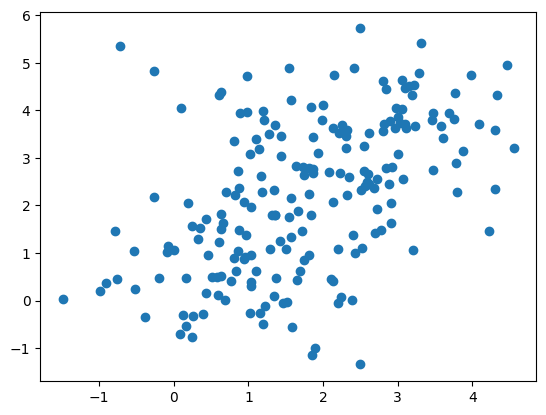

In [3]:
# Побудуємо графік для датасету data_2d
plt.scatter(data_2d[1], data_2d[2])
plt.show()

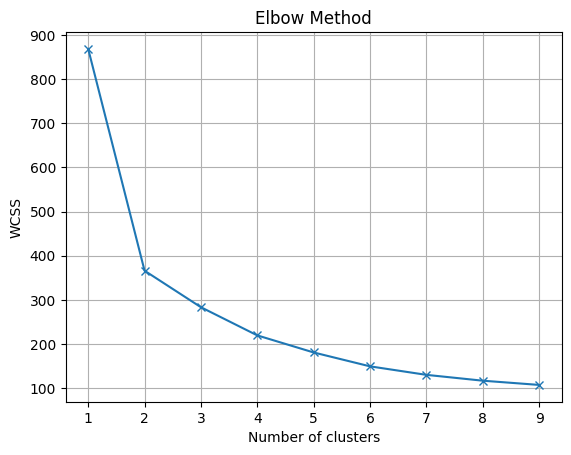

In [4]:
# Ліктевий метод визначення оптимальної кількості кластерів для data_2d
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(data_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker = 'x')
plt.grid()
plt.xticks(np.arange(1,10))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

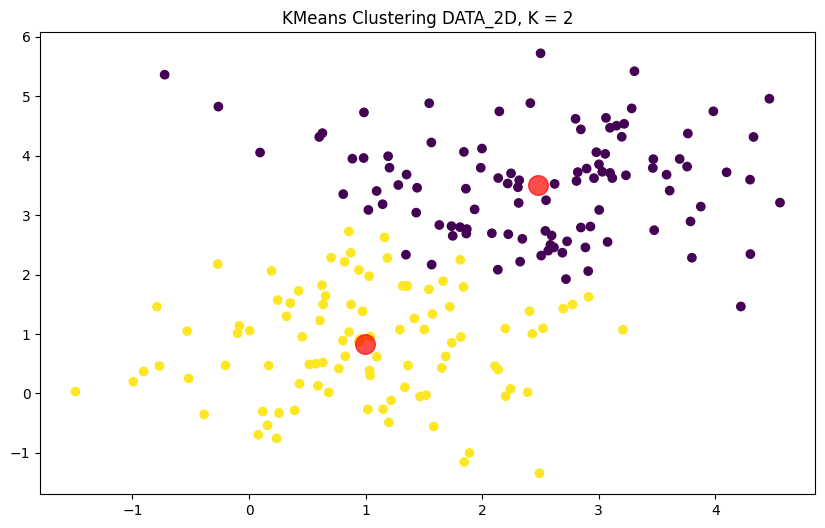

In [5]:
# Проведемо кластеризацію для датасету зменшеної розмірності data_2d
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

# create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data_2d[1], data_2d[2], c=kmeans.labels_, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DATA_2D, K = 2')
plt.show()



In [6]:
# Нормалізуємо датасет data_mnist
scaler = StandardScaler()
mnist_skaled = scaler.fit_transform(data_mnist)

# Зменшимо розмірність датасету до 2-х вимірного
pca = PCA(2)
principalComponents = pca.fit_transform(mnist_skaled)
data_mnist_pca = pd.DataFrame(data = principalComponents, columns=[1, 2])
data_mnist_pca.head()

,1,2
0,-4.528394,4.196712
1,5.026163,-12.467176
2,-6.907564,-5.889831
3,8.584193,-0.337781
4,1.105753,6.578064


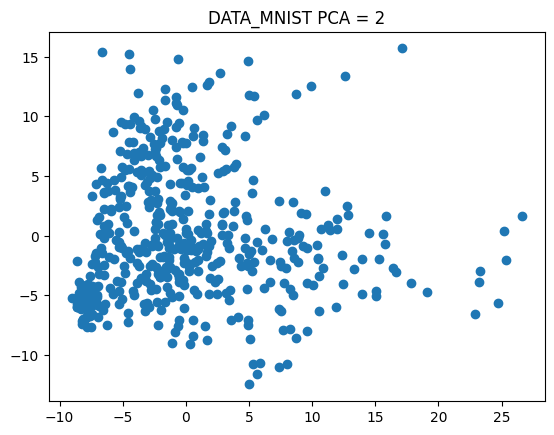

In [7]:
# Побудуємо графік для датасету data_mnist_pca, в якому ми зменшили розмірність
plt.scatter(data_mnist_pca[1], data_mnist_pca[2])
plt.title('DATA_MNIST PCA = 2')
plt.show()

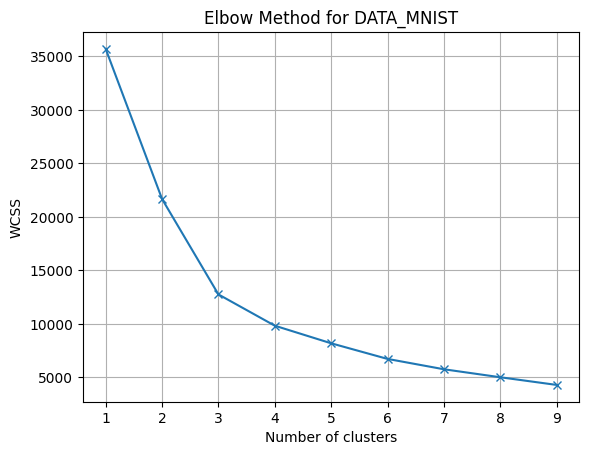

In [8]:
# Ліктевий метод визначення оптимальної кількості кластерів для data_mnist
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(data_mnist_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker = 'x')
plt.grid()
plt.xticks(np.arange(1,10))
plt.title('Elbow Method for DATA_MNIST')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Відповідно до ліктевого методу можемо визначити, що є два оптимальні кластери для датасету data_mnist

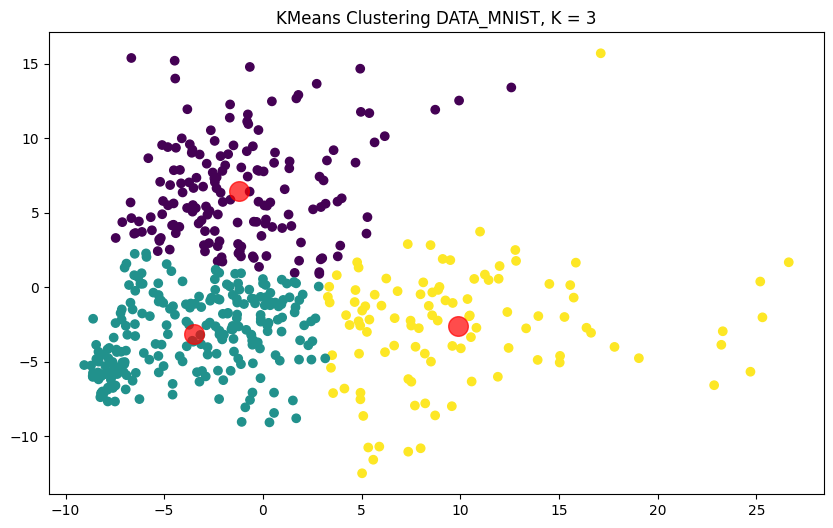

In [9]:
# Проведемо кластеризацію для датасету зменшеної розмірності data_mnist_pca
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data_mnist_pca)

# Побудуємо графік з визначенням кластеризації даних
plt.figure(figsize=(10,6))
plt.scatter(data_mnist_pca[1], data_mnist_pca[2], c=kmeans.labels_, cmap='viridis')

# Визначимо на графіку центроїди
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DATA_MNIST, K = 3')
plt.show()

## Додатково

**Проведемо аналіз на аномалії в датасеті data_2d**

In [38]:
display(data_2d.head())

,0,1,2,Cluster
0,0.0,-0.768716,0.460860,1
1,0.0,2.687848,2.366961,0
2,0.0,-0.201379,0.470430,1
3,0.0,0.608496,1.225400,1
4,0.0,-0.082282,1.137218,1


In [11]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

KMeans(n_clusters=2, n_init='auto')

In [12]:
# Будемо шукати аномалії окремо у кожному кластері

df_2d = data_2d
df_2d['Cluster'] = kmeans.labels_
cluster_1 = df_2d[df_2d['Cluster']==1]
cluster_2 = df_2d[df_2d['Cluster']==0]

Знайдемо аномалії за допомогою Standard Deviation

In [13]:
# Кластер 1

cluster_1_mean, cluster_1_std = cluster_1.mean(), cluster_1.std()
cut_off = cluster_1_std*3
lower, upper = cluster_1_mean - cut_off, cluster_1_mean + cut_off

outliers_3std_1 = ((cluster_1 < lower) | (cluster_1 > upper)).any(axis=1)
outliers_removed_3std_1 = cluster_1[~outliers_3std_1]

In [14]:
# Кластер 2

cluster_2_mean, cluster_2_std = cluster_2.mean(), cluster_2.std()
cut_off = cluster_2_std*3
lower, upper = cluster_2_mean - cut_off, cluster_2_mean + cut_off

outliers_3std_2 = ((cluster_2 < lower) | (cluster_2 > upper)).any(axis=1)
outliers_removed_3std_2 = cluster_2[~outliers_3std_2]

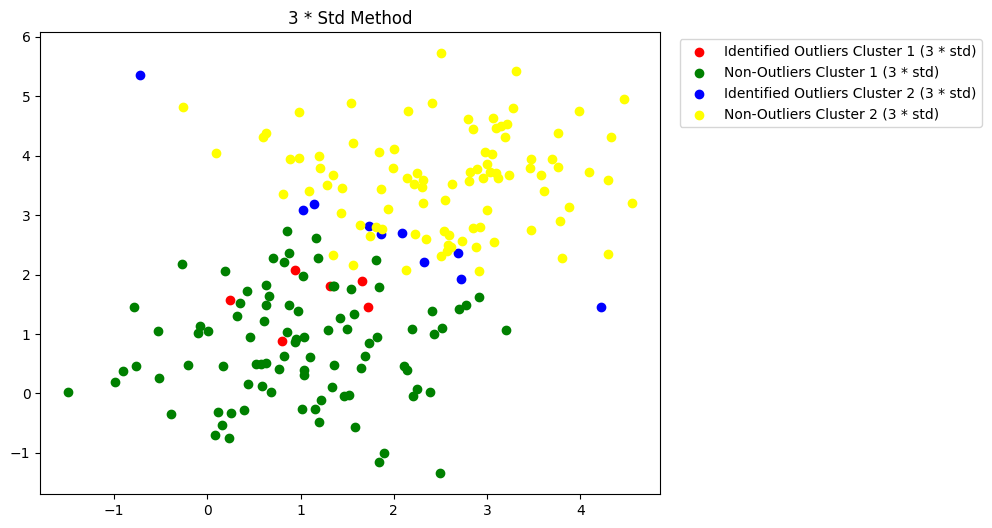

In [15]:
# Побудуємо графік

plt.figure(figsize=(8, 6))

# plt.scatter(df["sepal_length"], df["sepal_width"], color='blue', label='Original Data')
plt.scatter(cluster_1[outliers_3std_1][1], cluster_1[outliers_3std_1][2], color='red', label='Identified Outliers Cluster 1 (3 * std)')
plt.scatter(outliers_removed_3std_1[1], outliers_removed_3std_1[2], color='green', label='Non-Outliers Cluster 1 (3 * std)')
plt.scatter(cluster_2[outliers_3std_2][1], cluster_2[outliers_3std_2][2], color='blue', label='Identified Outliers Cluster 2 (3 * std)')
plt.scatter(outliers_removed_3std_2[1], outliers_removed_3std_2[2], color='yellow', label='Non-Outliers Cluster 2 (3 * std)')
plt.title('3 * Std Method')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.show()

Як бачимо, метод стандартного відхилення для кластеру 1 знаходить логічні аномалії, але для кластеру 2 працює візуально не так коректно

Знайдемо аномалії за допомогою Interquartile Range

In [16]:
# Кластер 1
q1 = cluster_1.quantile(0.25)
q3 = cluster_1.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_iqr_1 = ((cluster_1 < lower_bound) | (cluster_1 > upper_bound)).any(axis=1)
outliers_removed_iqr_1 = cluster_1[~outliers_iqr_1]

In [17]:
# Кластер 2
q1 = cluster_2.quantile(0.25)
q3 = cluster_2.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_iqr_2 = ((cluster_2 < lower_bound) | (cluster_2 > upper_bound)).any(axis=1)
outliers_removed_iqr_2 = cluster_2[~outliers_iqr_2]

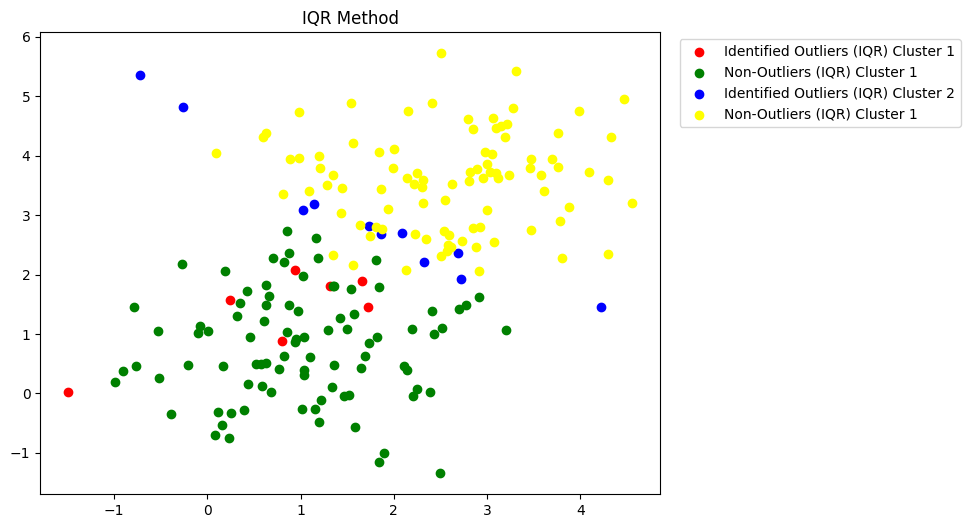

In [18]:
# Побудуємо графік

plt.figure(figsize=(8, 6))

# plt.scatter(df["sepal_length"], df["sepal_width"], color='blue', label='Original Data')
plt.scatter(cluster_1[outliers_iqr_1][1], cluster_1[outliers_iqr_1][2], color='red', label='Identified Outliers (IQR) Cluster 1')
plt.scatter(outliers_removed_iqr_1[1], outliers_removed_iqr_1[2], color='green', label='Non-Outliers (IQR) Cluster 1')
plt.scatter(cluster_2[outliers_iqr_2][1], cluster_2[outliers_iqr_2][2], color='blue', label='Identified Outliers (IQR) Cluster 2')
plt.scatter(outliers_removed_iqr_2[1], outliers_removed_iqr_2[2], color='yellow', label='Non-Outliers (IQR) Cluster 1')
plt.title('IQR Method')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.show()

Використавши метод Інтерквартильного діапазону, показники візуально показали більше аномалій ніж метод стандартного відхилення, тому перевіримо за допомогою інших алгоритмів

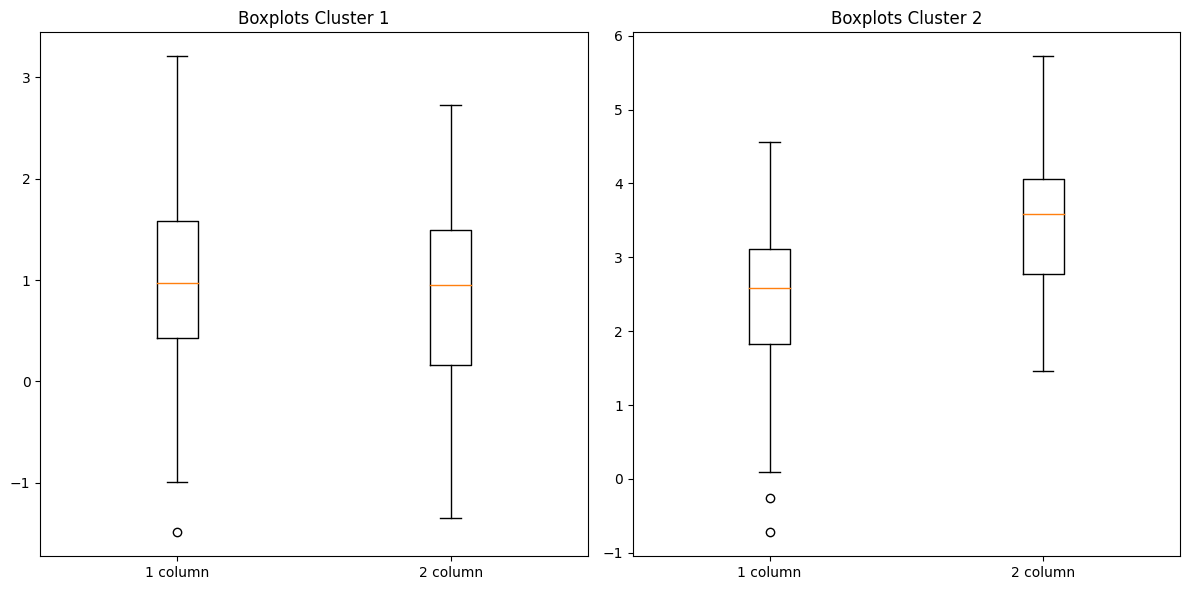

In [35]:
# Bloxplot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot([cluster_1[1], cluster_1[2]], labels=["1 column", "2 column"])
axes[0].set_title('Boxplots Cluster 1')

axes[1].boxplot([cluster_2[1], cluster_2[2]], labels=["1 column", "2 column"])
axes[1].set_title('Boxplots Cluster 2')

plt.tight_layout()
plt.show()

За допомогою блоксплоту бачимо, що в кластера 1 є одна аномалія (викиди), в кластера 2 - 2 викиди (значення знаходяться нижче третього квартиля)